# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [438]:
import pandas as pd
import numpy as np

data = pd.read_csv('Advertising.zip')

**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [439]:
print(f'Пропуски в данных: {data.isnull().any().any()}')

Пропуски в данных: False


In [440]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [441]:
X = np.array(data[['TV','radio','newspaper']])
y = np.array(data['sales'])


## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [442]:
import numpy as np

X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [443]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(n, m)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., m$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{m} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{m} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{n} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{m}x_{ij}$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{n}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [588]:
num_iters = 130 # опытным путём добиваемся минимальной разницы с предсказаниями модели за меньшее число итерации
m = X.shape[0]
n = X.shape[1]
w = np.zeros((n,1))
w_list = np.zeros((n,1))
for i in range(num_iters):
    w_list = np.insert(w_list,4,w, axis=0)
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum(((X @ w) - y) ** 2)/(len(y))

    
w_list.shape

(524, 1)

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [295]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [297]:
# Вернём изначальную (ненормализованную матрицу)
X = np.array(data[['TV','radio','newspaper']])
#  Создадим массив с нулями идентичный скалируемому
X_scalled = np.zeros((X.shape[0], X.shape[1]))
# В ходе цикла перезапишем каждый элемент нового массива
for i in range(X.shape[1]): # идём по столбцу 
    for j in range(X.shape[0]): # идём по строке
        # Из каждого элемента исходного массива вычтем среднее по столбцу и разделим на стандартное отклонение по столбцу
        X_scalled[j][i] = ((X[j][i] - X[:,i].mean()) / X[:,i].std()) 

X = X_scalled
       
print('Среднее масштабированного массива:: %.0f'%(X.mean()))
print('Стандартные отклонения масштабированного массива: %.0f'%(X.std()))


Среднее масштабированного массива:: -0
Стандартные отклонения масштабированного массива: 1


**Добавим единичный столбец**

In [298]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [304]:
def mse_error(y_real, y_pred):
    """_Функция вычисления среднеквадратичной ошибки_

    Args:
        x_real (_float_): _реальное значение_
        x_pred (_float_): _предсказанное значение_
    Returns:
        result (_float_): _значение MSE_
    """
    result = 0
    
    for i in range(len(y_real)):
        result+=((y_real[i] - y_pred[i])**2)

    return float(result / (i+1))

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [305]:
# Скопируем массив ответов
y_pred = y.copy()
# заполним его средним значением
y_pred.fill(y_pred.mean())
# посчитаем MSE
mse_naive = mse_error(y, y_pred)
mse_error(y, y_pred)

27.085743749999985

**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [306]:
# Обновим веса w для отмасштабированных данных
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
w = model.coef_

def lin_pred(X,w):
    """_Функция получит предсказания по весам линейной модели_

    Args:
        X (_array_): _матрица предикторов_
        w (_array_): _вектор весов линейной модели_

    Returns:
        _array_: _вектор прогнозов_
    """
    y_pred = np.zeros((X.shape[0], 1))
    
    for i in range(X.shape[0]):
            y_pred[i] = np.dot(w,X[i])
    return y_pred

y_pred = lin_pred(X,w)
mse_LR = mse_error(y,y_pred)

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [426]:
def stoch_grad_step(X, y, w, train_ind, eta):
    """_summary_

    Args:
        X (_array_): _матрица предикторов_
        y (_array_): _вектор ответов_
        w (_array_): _вектор весов_
        train_ind (_int _): _индекс объекта_
        eta (_float_): _шаг градиентного спуска_
    Returns:
        _array_: _обновленный вектор весов_
    """
    w_new = w - 2*eta*X[train_ind]*(np.dot(w,X[train_ind]) - y[train_ind])
    
    return w_new
stoch_grad_step(X, y, w, 1, 0.01)

array([14.01376323,  3.85639718,  2.79232702, -0.01794952])

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [310]:
def stochastic_gradient_descent(X, y, w, eta, max_iter, min_distance):
    """_summary_

    Args:
        X (_array_): _матрица предикторов_
        y (_array_): _вектор ответов_
        w (_array_): _вектор весов_
        eta (_float_): _шаг градиентного спуска_
        max_iter (_type_): _максимальное количество итерации_
        min_distance (_type_): _минимальное расстояние между векторами весов_
    """
    distance = np.inf
    
    w_init = w
    
    errors_list = []
    
    iter_count = 0
    
    np.random.seed(42)
    
    while distance > min_distance and iter_count < max_iter:
        random_ind = np.random.randint(X.shape[0])
        distance = np.linalg.norm(w[0]-stoch_grad_step(X, y, w, random_ind, eta)[0])
        w_new = stoch_grad_step(X, y, w, random_ind, eta)
        errors_list.append(mse_error(y, lin_pred(X, w_new)))
        w = w_new
        iter_count += 1
        
    return w, errors_list, iter_count

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

CPU times: total: 0 ns
Wall time: 0 ns


Text(0.5, 1.0, 'График зависимости ошибки от номера итерации')

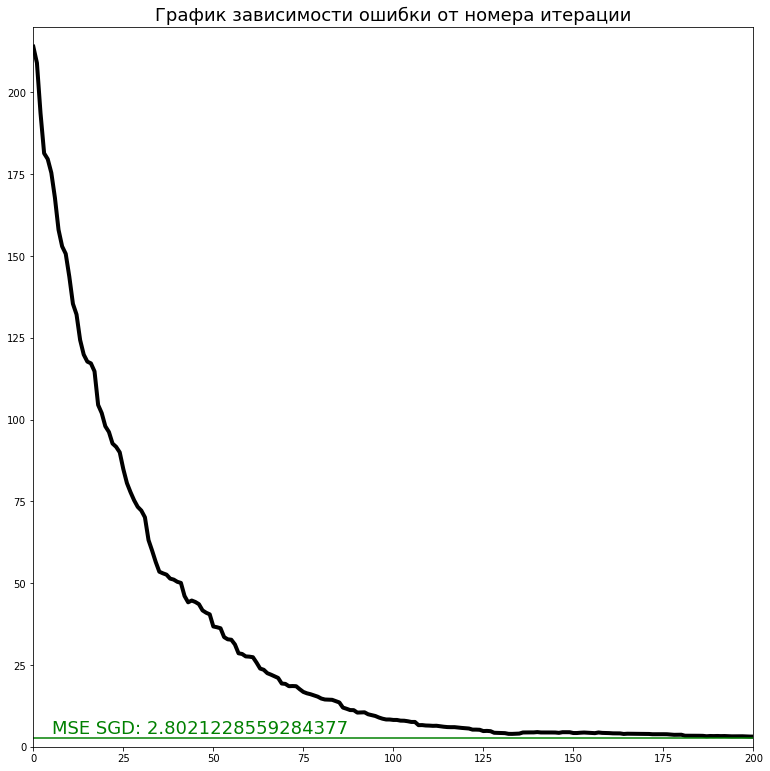

In [431]:
%time
w, errors_list, iter_count = stochastic_gradient_descent(X, y, np.zeros(4), 0.01, 10000, 0.00026)

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.3,0.3,1,1])
ax.plot(errors_list, c='k', linewidth=4)
ax.set_xlim(0,200)
ax.set_ylim(0,220)
ax.hlines(errors_list[-1],0,200, color='g')
ax.text(5.2, 4.2, f'MSE SGD: {errors_list[-1]}', fontsize = 18, color='g')
ax.set_title('График зависимости ошибки от номера итерации',fontsize = 18)

**Выведите вектор весов, к которому сошелся метод.**

In [432]:
w

array([1.40574615e+01, 3.80407386e+00, 2.83964389e+00, 1.13099357e-02])

**Выведите среднеквадратичную ошибку на последней итерации.**

In [433]:
errors_list[-1]

2.8021228559284377

Text(5.2, 0.2, 'MSE LR: 2.784126314510937')

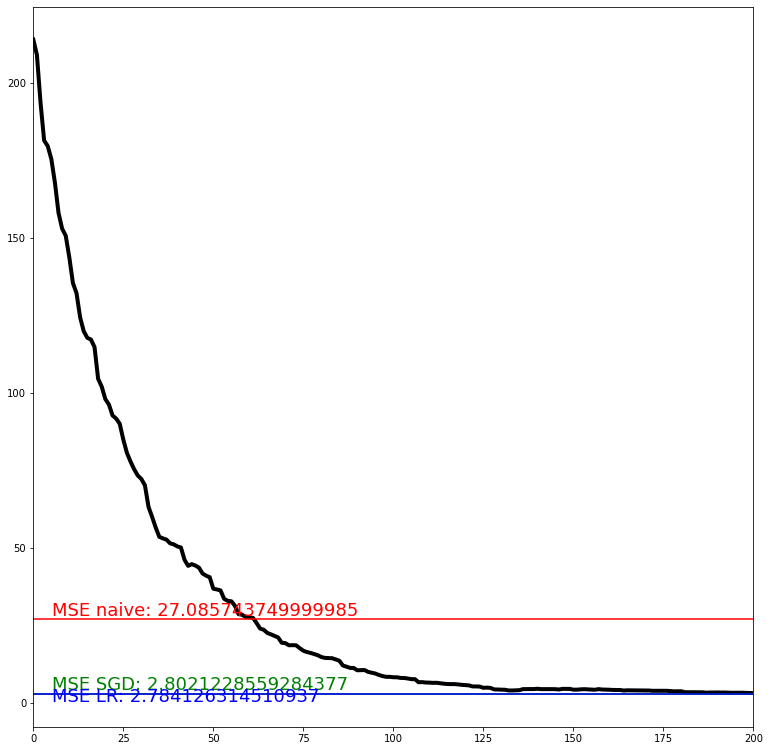

In [399]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.3,0.3,1,1])
ax.plot(errors_list, c='k', linewidth=4)
ax.set_xlim(0,200)
#ax.set_ylim(0,30)
ax.hlines(errors_list[-1],0,200, color='g')
ax.text(5.2, 4.2, f'MSE SGD: {errors_list[-1]}', fontsize = 18, color='g')
ax.hlines(mse_naive,0,200, color='r')
ax.text(5.2, 28.2, f'MSE naive: {mse_naive}', fontsize = 18, color='r')
ax.hlines(mse_LR,0,200, color='b')
ax.text(5.2, 0.2, f'MSE LR: {mse_LR}', fontsize = 18, color='b')